## Fashion MNIST

Since MNIST is a relatively easy dataset these days we will work on fashion MNIST. It's a relatively hard problem compared to MNIST and will give us a good idea about how our model is performing. It is also a better representation of real world datasets.

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:01, 14226004.31it/s]                             


Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 99260.92it/s]            
0it [00:00, ?it/s]

Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4297032.26it/s]                            
0it [00:00, ?it/s]

Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 37908.42it/s]            

Extracting /tmp/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


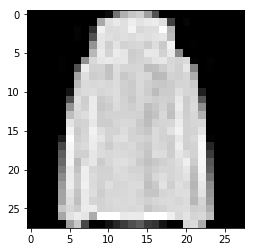

In [3]:
image, label = next(iter(trainloader))
plt.imshow(image[1,:].reshape((28,28)), cmap="gray");

In [4]:
# model = nn.Sequential(nn.Linear(784, 256),
#                       nn.ReLU(),
#                       nn.Linear(256, 128),
#                       nn.ReLU(),
#                       nn.Linear(128, 64),
#                       nn.ReLU(),
#                       nn.Linear(64, 10),
#                       nn.LogSoftmax(dim = 1))

In [5]:
import torch.nn.functional as F

In [6]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(784, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # reshape the images
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.log_softmax(self.layer4(x), dim = 1)
        
        return x

In [7]:
model = MyNetwork()

In [8]:
model

MyNetwork(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)

In [9]:
criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [10]:
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Running loss: ", running_loss)

Running loss:  477.8334218710661
Running loss:  368.0196294337511
Running loss:  335.19797655195
Running loss:  310.2110946998
Running loss:  298.86272832751274


In [11]:
# epochs = 5
# for e in range(epochs):
#     running_loss = 0
#     for images, labels in trainloader:
#         images.resize_(64,784)
        
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
        
#         running_loss += loss.item()
#     else:
#         print("Running loss: ", running_loss)
